In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_raw = pd.read_csv('data/train.csv')

In [5]:
df_raw.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


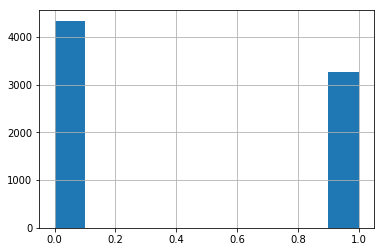

In [6]:
df_raw['target'].hist()

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df_check = df_raw.copy().drop(['keyword','location','id'], axis=1)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(df_check['text'], df_check['target'], test_size=0.25, random_state=42)

In [11]:
reglog_pipe = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()) # train on TF-IDF vectors w/ SGD classifier
])

reglog_pipe.fit(X_train, y_train);
reglog_pipe.predict(X_val)

C:\Users\BPS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [12]:
print(classification_report(y_val, reglog_pipe.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1091
           1       0.81      0.72      0.76       813

   micro avg       0.81      0.81      0.81      1904
   macro avg       0.81      0.80      0.80      1904
weighted avg       0.81      0.81      0.80      1904



In [13]:
X_test = pd.read_csv('data/test.csv')

In [14]:
X_test_id = X_test['id']
X_test = X_test['text']

In [15]:
reglog_pipe = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()) # train on TF-IDF vectors w/ SGD classifier
])

reglog_pipe.fit(X_train, y_train);
predictions=reglog_pipe.predict(X_test)

In [16]:
result = pd.DataFrame(data={'id': X_test_id, 'target': predictions})

In [17]:
result.to_csv('data/submit.csv')

In [18]:
 reglog_pipe.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)